# Gender x Gender Analysis

From the main analysis file, we have found some specifics of Gender x Gender in the use of hedges, but let's just try to examine some specific words just for fun! I will be basing this off of the [study](https://nlp.stanford.edu/robvoigt/rtgender/rtgender.pdf) that this data is from, where they did something similar.

For this quick analysis, I'm going to examine some "stereotypical" words that I think people may use when interacting with different genders.

In [1]:
# import things
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# look at df from when we know both genders
# made up of fitocracy and some reddit
gender_visible_df = pd.read_pickle("gender_visible_df.pkl")
gender_visible_df.sample(5)

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_hedges,response_hedges,post_questions,response_questions
182769,735740,M,7715,W,just joined the Stronglifts group!,Hello! Welcome to the site; Fitocracy is a gre...,fitocracy,"[just, joined, the, Stronglifts, group, !]","[Hello, !, Welcome, to, the, site, ;, Fitocrac...",6,95,6.0,47.5,0,0,0,0
18905,46772,W,99844,M,Starting to hate burpees lol XD,starting? lol,fitocracy,"[Starting, to, hate, burpees, lol, XD]","[starting, ?, lol]",6,3,6.0,1.5,0,0,0,0
44073,119576,W,1386156,M,hello new fito-friend!,hello there! nice PP!,fitocracy,"[hello, new, fito-friend, !]","[hello, there, !, nice, PP, !]",4,6,4.0,3.0,0,0,0,0
172693,687335,M,681539,M,just joined the WTF - Welcome to Fitocracy group!,welcome brotha,fitocracy,"[just, joined, the, WTF, -, Welcome, to, Fitoc...","[welcome, brotha]",10,2,10.0,2.0,0,0,0,0
41901,114314,M,425205,M,"Hey Handsome, Sent you PM.",wow. handsome indeed,fitocracy,"[Hey, Handsome, ,, Sent, you, PM, .]","[wow, ., handsome, indeed]",7,4,7.0,2.0,0,0,0,0


In [3]:
# get rid of duplicates again from automated posts and common posts
gender_visible_df.drop_duplicates(subset=['post_text','response_text'], keep=False, inplace=True)

In [4]:
# stereotypical language
m_to_m = ['bro','dude','man']
f_to_f = ['girl','girly','girlie','chica'] # somewhat problematic... not as many that I can think of

### Male to male

In [5]:
def find_mtom(text):
    text = text.lower()
    if any(word in text for word in m_to_m):
        return 1
    else:
        return 0
    
gender_visible_df['m_to_m'] = gender_visible_df.response_text.map(find_mtom)

In [6]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).m_to_m.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 124907.0  0.132643  0.339190  0.0  0.0  0.0  0.0   
          W                  84324.0  0.051480  0.220976  0.0  0.0  0.0  0.0   
W         M                  85059.0  0.043981  0.205055  0.0  0.0  0.0  0.0   
          W                  47298.0  0.031080  0.173535  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

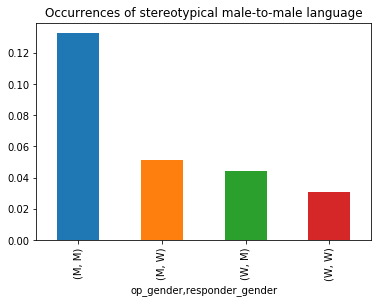

In [7]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).m_to_m.mean().plot(kind='bar',
                                        title='Occurrences of stereotypical male-to-male language')
plt.show()

As we can see, 'bro', 'dude', and 'man' are much more widely used in a male-to-male context.

### Female to female

In [8]:
def find_ftof(text):
    text = text.lower()
    if any(word in text for word in f_to_f):
        return 1
    else:
        return 0

gender_visible_df['f_to_f'] = gender_visible_df.response_text.map(find_ftof)

In [9]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 124907.0  0.022865  0.149474  0.0  0.0  0.0  0.0   
          W                  84324.0  0.013887  0.117022  0.0  0.0  0.0  0.0   
W         M                  85059.0  0.018423  0.134474  0.0  0.0  0.0  0.0   
          W                  47298.0  0.018204  0.133689  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

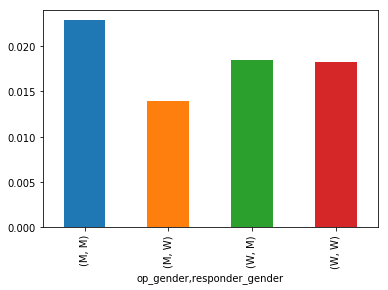

In [10]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.mean().plot(kind='bar')
plt.show()

Hm... these aren't really the results I'd like to see. Why are male responders using this seemingly female-to-female language so much more? Maybe they're using the word "girl" to talk about girls instead of address people as girls.

In [11]:
sample = gender_visible_df[(gender_visible_df.f_to_f == 1) &
                           (gender_visible_df.responder_gender == 'M')].sample(3)

for entry in sample.response_text:
    print(entry)
    print()

Have you seen the one where they do the Skesis?!? It took everything I had not to fangirl squee during that episode...

Only if you have problems lasting.  Id rather cum in a girl than in my hand. 

Even if the kid may not be his, it sounds like he really loves his little girl because he raised her. Blood or not doesnt matter. A DNA test is such a bad idea because he could end up losing all visitation rights if he turns out he isnt the father, and I am pretty sure that would hurt the OP even more.  Also, from the sound of this lady, if there was any chance that he wasnt the father, she would have demanded a DNA test.



Yes, they don't really seem to be addressing people as girl. Let's get rid of this:

In [12]:
f_to_f = ['girly','girlie','chica']
gender_visible_df['f_to_f'] = gender_visible_df.response_text.map(find_ftof)
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.describe()

count      mean       std  min  25%  50%  75%  \
op_gender responder_gender                                                     
M         M                 124907.0  0.000769  0.027713  0.0  0.0  0.0  0.0   
          W                  84324.0  0.000688  0.026218  0.0  0.0  0.0  0.0   
W         M                  85059.0  0.000988  0.031410  0.0  0.0  0.0  0.0   
          W                  47298.0  0.002262  0.047510  0.0  0.0  0.0  0.0   

                            max  
op_gender responder_gender       
M         M                 1.0  
          W                 1.0  
W         M                 1.0  
          W                 1.0

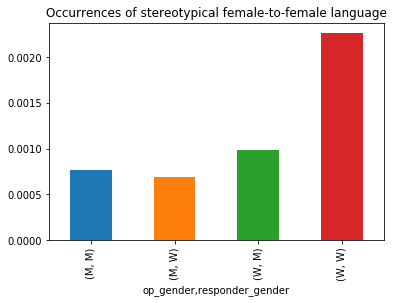

In [13]:
gender_visible_df.groupby(['op_gender', 'responder_gender']).f_to_f.mean().plot(kind='bar',
                                            title='Occurrences of stereotypical female-to-female language')
plt.show()

So now there's way less occurrences of this female-to-female language, but it at least makes sense now.

### Examining random words

How about something like "beautiful"?

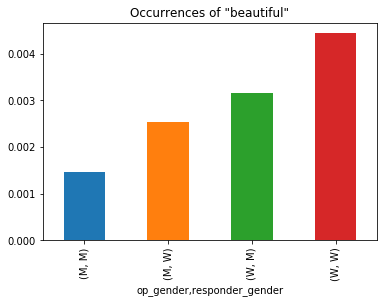

op_gender  responder_gender
M          M                   0.001465
           W                   0.002526
W          M                   0.003151
           W                   0.004440
dtype: float64

In [14]:
beautiful = gender_visible_df[gender_visible_df.response_text.str.contains('beautiful', case=False)]

# need to divide to normalize
(beautiful.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size()).plot(kind='bar',
                                                                          title='Occurrences of "beautiful"')
plt.show()

(beautiful.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size())

So it women call other women beautiful the most.

Who uses "sexy"?

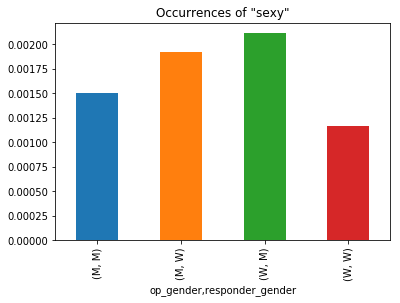

op_gender  responder_gender
M          M                   0.001505
           W                   0.001921
W          M                   0.002116
           W                   0.001163
dtype: float64

In [15]:
sexy = gender_visible_df[gender_visible_df.response_text.str.contains('sexy', case=False)]

# need to divide to normalize
(sexy.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size()).plot(kind='bar',
                                                                          title='Occurrences of "sexy"')
plt.show()

(sexy.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size())

This time, the most is male to female.

How about saying "good job"?

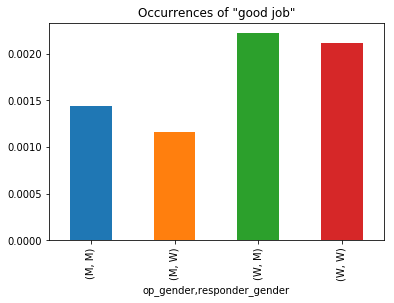

op_gender  responder_gender
M          M                   0.001505
           W                   0.001921
W          M                   0.002116
           W                   0.001163
dtype: float64

In [16]:
good_job = gender_visible_df[gender_visible_df.response_text.str.contains('good job', case=False)]

# need to divide to normalize
(good_job.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size()).plot(kind='bar',
                                                                          title='Occurrences of "good job"')
plt.show()

(sexy.groupby(['op_gender','responder_gender']).size() /
 gender_visible_df.groupby(['op_gender','responder_gender']).size())

This time, the highest proportion is male to female, followed closely by female to female.